## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load data from csv file into a Pandas dataframe
df= pd.read_csv('ab_data.csv')
#display the first five rows
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#number of rows 
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#Number of unique user
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [5]:
# proportion of users converted
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Calculate the two cases where the `new_page` and `treatment` don't match
  # old_page & treatment
result1=df.query('landing_page == "old_page" and group=="treatment"')['user_id'].count()
  #new_page & control
result2=df.query('landing_page == "new_page" and group=="control"')['user_id'].count()
#Adding two values
finalReult=result1+result2
print(finalReult)

3893


f. Do any of the rows have missing values?

In [7]:
# Check if there is missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**From the output we can obsereve that there is no any of the rows have missing values**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Create dataFream for that meets the specifications

df2=df.query('(landing_page == "new_page" and group =="treatment") or (landing_page == "old_page" and group=="control")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Number of unique user
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Check duplicate user and print the ID
df2[df2['user_id'].duplicated()== True]['user_id']


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#Show the row information for the repeat user_id
df2[df2['user_id'].duplicated(keep=False)== True]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Remove one record  from the duplicate rows
df2.drop(df2[df2['user_id'].duplicated()== True].index,inplace = True) 

/Users/Mesho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Probability of converting regardless of page
df2['converted'].mean()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Probability of converting For the control group

CProbability=df2.query('group == "control"')['converted'].mean()
CProbability

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Probability of converting For the treatment group

TProbability=df2.query('group == "treatment"')['converted'].mean()
TProbability

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#The probability of receiving the new page.
(df2.landing_page == 'new_page').sum()/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no sufficient evidence that tell the new treatment page leads to more conversions.Need to investigate more since the probabilities of both groups  are very close.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$H_0$:**$p_{new}$** - **$p_{old}$** <=0 <br>
$H_1$:**$p_{new}$** - **$p_{old}$** >0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#  Assuming 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑  have equal to the converted success rate regardless of page
CR_NewPage=df2['converted'].mean()
CR_NewPage

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
#  Assuming 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑  have equal conversion rate regardless of page
CR_OldPage=df2['converted'].mean()
CR_OldPage

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#Calculate the number of individuals in the treatment group

Num_New=len(df2.query('group =="treatment"') )


Num_New

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#Calculate the number of individuals in the control group

Num_Old=len(df2.query('group =="control"') )

Num_Old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
#Store outcome of with a conversion rate of  𝑝𝑛𝑒𝑤
new_page_converted =np.random.choice([1,0],size=Num_New,p=[CR_NewPage,(1-CR_NewPage)])
#Print
new_page_converted

array([1, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
#Store outcome of with a conversion rate of  𝑝𝑜𝑙𝑑
old_page_converted =np.random.choice([1,0],size=Num_Old,p=[CR_OldPage,(1-CR_OldPage)])
#Print
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [46]:
#𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 
diff=new_page_converted.mean()-old_page_converted.mean()
#Print
diff

0.0006033056282814253

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [47]:
# NumPy array to store the diffrence of conversion rate between Old page and New page
p_diffs=[]
# Create sampling distribution for difference in completion rates
# with boostrapping
for _ in range(10000):
    Mean_new_page_converted =np.random.choice([1,0],size=Num_New,p=[CR_NewPage,(1-CR_NewPage)]).mean()
    Mean_old_page_converted =np.random.choice([1,0],size=Num_Old,p=[CR_OldPage,(1-CR_OldPage)]).mean()
    p_diffs.append(Mean_new_page_converted - Mean_old_page_converted)



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

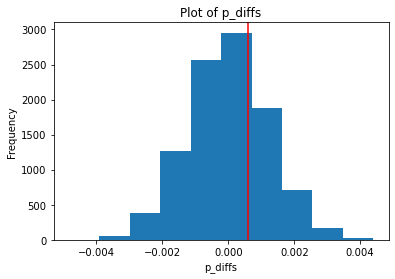

In [48]:
# convert to numpy array
p_diffs = np.array(p_diffs)
# plot sampling distribution
plt.hist(p_diffs);
plt.axvline(x=diff, color="red");
#set x lable
plt.xlabel('p_diffs')
#set y lable
plt.ylabel('Frequency')
#set title
plt.title('Plot of p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [49]:
# Calculate the Mean difference between the two group from the original datafream
actual_differ=(df[df['group'] == 'treatment']['converted'].mean()) -  (df[df['group'] == 'control']['converted'].mean())

(p_diffs>actual_differ).mean()

0.8914

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-values  has been computted here.It is the probability of getting our statistic or a more extreme value if the null is true.**

**By comparing our p-value (0.89)to our Type I error rate  (0.05),We fail to reject the null hypothesis since the p-value is larger than Type I error rate.That is mean the old page has a more probability of conversion rate than the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [50]:
import statsmodels.api as sm
#Conversions for control group
convert_old = df2.query('group =="control"')['converted'].sum()
#Conversions for treatment group
convert_new = df2.query('group =="treatment"')['converted'].sum()
# number of rows for old page 
n_old = len(df2.query('landing_page == "old_page"'))
# Number of rows for new pages
n_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [51]:
#Import statement for Z-Test
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
#Calculate Z_test and  p_value
Z_test, p_value = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#Print the result
print('p_value for the z-test :{0:0.3f}'.format(p_value))
print('Z-Score :{0:0.3f}'.format(Z_test))

p_value for the z-test :0.905
Z-Score :1.311


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations,So 
z -Score is so low , the probability that Ho is true is so high that we fail to reject H0. Also the p_value is larger than Type I error rate.Therefore, we can conclude that the old page has a more probability of conversion rate than the new page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression since the probability is conversion or no conversion

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
#Import Library
import statsmodels.api as sm
#create  dummy variables
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
#create intercept
df2['intercept'] = 1
df2.head()


<ipython-input-52-a414c09dfb20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
<ipython-input-52-a414c09dfb20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
# fit the Logistic model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
Result = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
# show the result summary
Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:38:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190 which is diffrent with the previous calculated p-value (0.8914).
This difference back  to the difference on the null hypothesis.In Part III ,the null hypothesisn is old page have equal effective to the new page(two-tailed test) while the Part II the null hypothesisn is old page have equal or more effective than the new page(one-tailed test ).**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**consider more  factors to be added into regression model will always improve the model through giving ability to determine the relative influence of one or more predictor variables to the criterion value and  identify outliers.However Any disadvantage of using a multiple regression model usually comes down to the data being used.** 



Reference :https://sciencing.com/difference-between-bivariate-multivariate-analyses-8667797.html

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
# Load data from csv file into a Pandas dataframe
C_df= pd.read_csv('countries.csv')
#show the dataset info
C_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


**From the above table we will join the dataframes based on key (user_id)**

In [61]:
#join 2 datafream
New_df=df2.set_index('user_id').join(C_df.set_index('user_id'))
#Show the result to confirm the update
New_df.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [67]:
#New_df["country"].unique()
New_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

**So We need to create three dummy variable**

In [78]:
#create  dummy variables
New_df['CA'] = pd.get_dummies(New_df['country'])['CA']
New_df['UK'] = pd.get_dummies(New_df['country'])['UK']
New_df['US'] = pd.get_dummies(New_df['country'])['US']


In [79]:
# fit the Logistic model US and UK
log_mod_country = sm.Logit(New_df['converted'], New_df[['intercept','US','UK']])
Result_country = log_mod_country.fit()
Result_country.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:04:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [87]:
# fit the Logistic model CA and UK
log_mod_country = sm.Logit(New_df['converted'], New_df[['intercept','CA','UK']])
Result_country = log_mod_country.fit()
Result_country.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:12:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**The model  adding new factor to analysis the effect of conversion  based on which country a user lives in.we  can conclude p-value still higher thanType I error rate of 0.05 ,So We can not  reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [88]:
# fit the Logistic model country and page factores
log_mod = sm.Logit(New_df['converted'], New_df[['intercept', 'ab_page','CA','US']])
Result = log_mod.fit()
Result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        19:42:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

***Conclusions :***

The model  combine the  factors of country and page on conversion.we  can conclude that the p-value still higher than Type I error rate  of 0.05.
From the above analysis  there is no significant effect on the new page ,It is recommend the company to keep the old page

That's mean  accept the Null Hypothesis and reject the Alternate Hypothesis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255